# 3D MODEL QA

Import all needed modules.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from glob import glob
from tqdm.notebook import tqdm

Size of a single grid cell in the same units as X and Y.

In [ ]:
grid_size = 1


Y04Crop.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


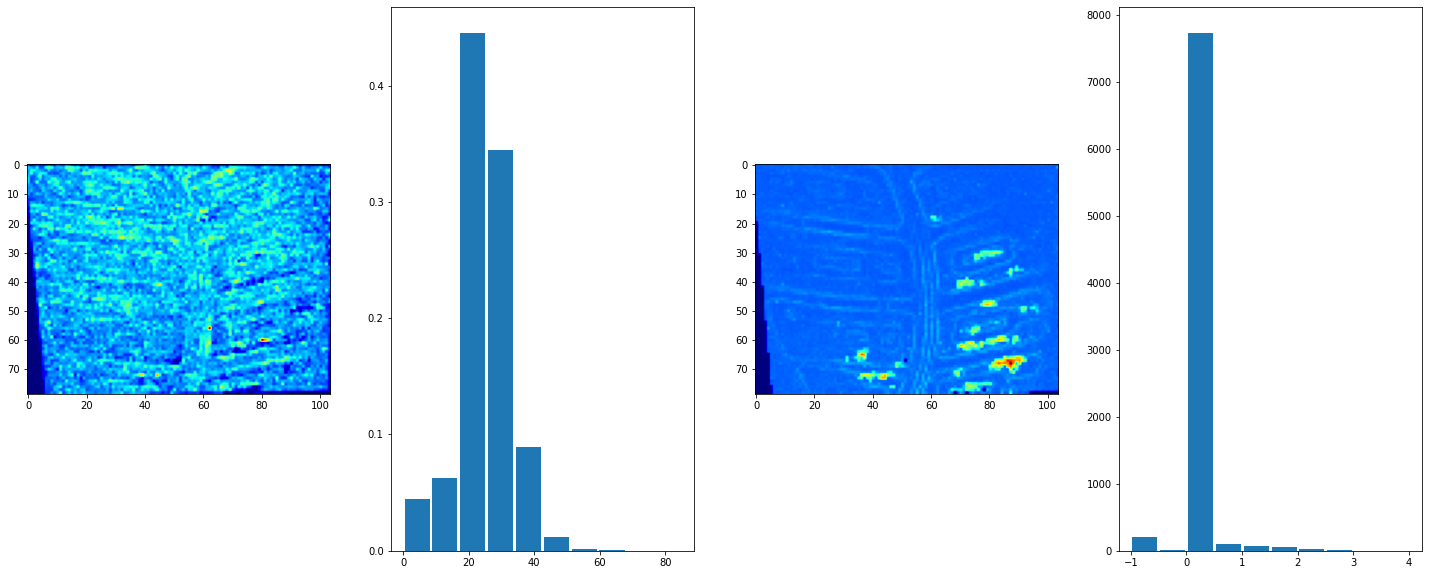

In [ ]:
for fname in glob('*.csv'):

    print('\n' + fname)
    
    data = pd.read_csv(fname, skiprows=1).values[:, :3]
    mnX, mxX = np.min(data[:, 0]), np.max(data[:, 0])
    mnY, mxY = np.min(data[:, 1]), np.max(data[:, 1])

    mnX = np.sign(mnX) * np.floor(np.abs(mnX) / grid_size) * grid_size
    mxX = np.sign(mxX) * np.floor(np.abs(mxX) / grid_size) * grid_size
    mnY = np.sign(mnY) * np.floor(np.abs(mnY) / grid_size) * grid_size
    mxY = np.sign(mxY) * np.floor(np.abs(mxY) / grid_size) * grid_size

    xedges, yedges = np.arange(mnX, mxX + 1, grid_size), np.arange(mnY, mxY + 1, grid_size)
    xrange = xedges.max() - xedges.min()
    yrange = yedges.max() - yedges.min()

    area = xrange * yrange

    # variability of Z in each cell
    cnts = np.zeros((len(xedges) - 1, len(yedges) - 1))
    stds = np.zeros((len(xedges) - 1, len(yedges) - 1))
    for x in tqdm(range(len(xedges) - 1)):
        for y in range(len(yedges) - 1):
            mask1 = data[:, 0] >= xedges[x]
            mask2 = data[:, 0] < xedges[x + 1]
            mask3 = data[:, 1] >= yedges[y]
            mask4 = data[:, 1] < yedges[y + 1]

            Z = data[mask1 & mask2 & mask3 & mask4, 2]
            cnts[x, y] = len(Z)
            stds[x, y] = np.std(Z) if len(Z) > 0 else -1

    cnts_flat = np.reshape(cnts, (-1, 1))
    cnts_hist, cnts_bins = np.histogram(cnts_flat)
    cnts_hist = cnts_hist / np.sum(cnts_hist)
    
    stds_flat = np.reshape(stds, (-1, 1))
    stds_hist, stds_bins = np.histogram(stds_flat)
    
    fig, ax = plt.subplots(1, 4, figsize=(25, 10))
    ax[0].imshow(cnts, cmap='jet')
    ax[1].bar((cnts_bins[:-1] + cnts_bins[1:])/2, cnts_hist, width=0.9*(cnts_bins[1]-cnts_bins[0]))
    ax[2].imshow(stds, cmap='jet')
    ax[3].bar((stds_bins[:-1] + stds_bins[1:])/2, stds_hist, width=0.9*(stds_bins[1]-stds_bins[0]))
    plt.show()
    
    # save histogram data to .CSV
    np.savetxt(fname + "hist1.csv", np.array([(cnts_bins[:-1] + cnts_bins[1:])/2, cnts_hist]).T, delimiter=",")
    np.savetxt(fname + "hist2.csv", np.array([(stds_bins[:-1] + stds_bins[1:])/2, stds_hist]).T, delimiter=",")
    np.savetxt(fname + "cnts.csv", cnts_flat, delimiter=",")
    np.savetxt(fname + "stds.csv", stds_flat, delimiter=",")

    # save figure
    fig.savefig(fname + ".svg", dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
#     print(f'\nArea: {area}')